# SVM (Support Vector Machine)

- 데이터의 분포 가정이 힘들 때...(정규분포는 아닌 것 같고..) 데이터를 잘 나누려면?
    - Boundary에 집중
    - margin을 최대화 하는 boundary를 찾는 것.


- 정확히 구분이 되지 않는 경우가 존재한다면? 다른 색의 점이 다른 영역에 침투했을 때.
    - 적당한 error를 허용하고, 이를 최소화하도록 boundary를 결정.

- 보통 SVM이라고 하면 범주형 변수에 대해 이야기함.

### 범주형 변수
    - Support Vector Classifier
    
    
### 연속형 변수
    - Support Vector Regression (SVR)

### SVM, SVR의 핵심
- Model Cost에 영향을 끼칠 점과 끼치지 않을 점을 margin을 통해 구분
    - SVM
        - Margin 안에 포함되거나, 반대방향으로 분류된 점들.
            > 경계 부근에 있는 점들을 반영하여 Model Cost 계산.
        
        <br>
    - SVR
        - Margin 바깥에 위치한 점들.
            > 최대한 없게끔 만들어 Model Cost 계산.

# 실습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

C = 1 # SVM의 regularization parameter
clf = svm.SVC(kernel='linear', C=C) # 커널 주지않음.
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [3]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

### kernel SVM 적합 및 비교

- LinearSVC

In [5]:
clf=svm.LinearSVC(C=C, max_iter=10000)
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

- radial basis function

In [7]:
clf=svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000)
# gamma = 전체적인 분포의 높낮이를 지정해줌.
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]])

- polynomial kernel

In [8]:
clf=svm.SVC(kernel='poly', degree=3, C=C, gamma='auto', max_iter=10000)
# degree : 몇차까지 할 것인지? 위는 3차까지 한다는 의미.
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


array([[50,  0,  0],
       [ 0, 34, 16],
       [ 0, 11, 39]])

### 시각적 비교

In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [20]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델 정의 및 피팅

In [21]:
C = 1.0 # Regularization parameter
models = (svm.SVC(kernel='linear', C=C),
         svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000),
          svm.SVC(kernel='poly', degree=3, C=C, gamma='auto', max_iter=10000)
         )
models = (clf.fit(X,y) for clf in models)

In [22]:
titles = ('SVC with linear kernel',
         'Linear SVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel')

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


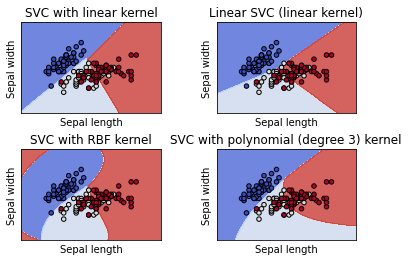

In [23]:
fig, sub = plt.subplots(2, 2)
plt. subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

- Linear와 SVC의 모양은 큰 차이가 없으나 영역의 차이가 있음.
- RBF과 polynomial은 곡선의 형태로 나타남.